# Dataset source: 
https://nijianmo.github.io/amazon/index.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_json("Movies_and_TV_5.json.gz", compression='gzip', lines=True)

In [3]:
df1 = df 
# Save original backup copy to df1

In [4]:
df.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5,True,"11 9, 2012",A2M1CU2IRZG0K9,0005089549,{'Format:': ' VHS Tape'},Terri,So sorry I didn't purchase this years ago when...,Amazing!,1352419200,NaN,NaN
1,5,True,"12 30, 2011",AFTUJYISOFHY6,0005089549,{'Format:': ' VHS Tape'},Melissa D. Abercrombie,Believe me when I tell you that you will recei...,Great Gospel VHS of the Cathedrals!,1325203200,NaN,NaN
2,5,True,"04 21, 2005",A3JVF9Y53BEOGC,000503860X,{'Format:': ' DVD'},Anthony Thompson,"I have seen X live many times, both in the ear...",A great document of a great band,1114041600,11,NaN
3,5,True,"04 6, 2005",A12VPEOEZS1KTC,000503860X,{'Format:': ' DVD'},JadeRain,"I was so excited for this! Finally, a live co...",YES!! X LIVE!!,1112745600,5,NaN
4,5,True,"12 3, 2010",ATLZNVLYKP9AZ,000503860X,{'Format:': ' DVD'},T. Fisher,X is one of the best punk bands ever. I don't ...,X have still got it,1291334400,5,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3410019 entries, 0 to 3410018
Data columns (total 12 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   overall         int64 
 1   verified        bool  
 2   reviewTime      object
 3   reviewerID      object
 4   asin            object
 5   style           object
 6   reviewerName    object
 7   reviewText      object
 8   summary         object
 9   unixReviewTime  int64 
 10  vote            object
 11  image           object
dtypes: bool(1), int64(2), object(9)
memory usage: 289.4+ MB


In [6]:
df.columns

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin', 'style',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'image'],
      dtype='object')

# Data Cleaning

In [7]:
df.isnull().sum()
# will be dropping null for column 'styles' ~5% of data

overall                 0
verified                0
reviewTime              0
reviewerID              0
asin                    0
style              174207
reviewerName           82
reviewText           1581
summary               640
unixReviewTime          0
vote              2768010
image             3403048
dtype: int64

In [8]:
df['style'].value_counts() 

TypeError: unhashable type: 'dict'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'dict'


{'Format:': ' DVD'}                                1645586
{'Format:': ' Amazon Video'}                       1027966
{'Format:': ' Blu-ray'}                             335181
{'Format:': ' Prime Video'}                         158950
{'Format:': ' VHS Tape'}                             61821
{'Format:': ' HD DVD'}                                1475
{'Format:': ' DVD-R'}                                 1428
{'Format:': ' Theatrical Release'}                     801
{'Format:': ' Audio CD'}                               657
{'Format:': ' DVD-ROM'}                                474
{'Format:': ' UMD for PSP'}                            352
{'Format:': ' Amazon Instant Video'}                   250
{'Format:': ' Electronics'}                            116
{'Format:': ' Hardcover'}                              107
{'Format:': ' Interactive DVD'}                         97
{'Format:': ' Paperback'}                               86
{'Format:': ' Laser Disc'}                              

In [9]:
df['reviewText']

0          So sorry I didn't purchase this years ago when...
1          Believe me when I tell you that you will recei...
2          I have seen X live many times, both in the ear...
3          I was so excited for this!  Finally, a live co...
4          X is one of the best punk bands ever. I don't ...
                                 ...                        
3410014    The singing parts are very good as expected fr...
3410015    This recording of the 2015 production by the M...
3410016    I do not wish to write a review about this rel...
3410017                                       It was a gift.
3410018    This Otello originates from the Salzburg Festi...
Name: reviewText, Length: 3410019, dtype: object

In [10]:
df['reviewText'][0]

"So sorry I didn't purchase this years ago when it first came out!!  This is very good and entertaining!  We absolutely loved it and anticipate seeing it repeatedly.  We actually wore out the cassette years back, so we also purchased this same product on cd.  Best purchase we made out of all!  Would purchase on dvd if we could find one."

In [11]:
# drop null values from these columns
df = df.dropna(subset=['style','reviewerName', 'reviewText', 'summary'])

In [12]:
# drop these columns
df.drop(['vote','image','unixReviewTime'],axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [13]:
df.isnull().sum()

overall         0
verified        0
reviewTime      0
reviewerID      0
asin            0
style           0
reviewerName    0
reviewText      0
summary         0
dtype: int64

In [14]:
duplicated_reviews = df[df.duplicated(['reviewText'], keep=False)]

In [34]:
duplicated_reviews.info()
# we have about 860k duplicates of text review
# lets remove them, which is about 25% of the dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 868955 entries, 29 to 3410018
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   overall       868955 non-null  int64 
 1   verified      868955 non-null  bool  
 2   reviewTime    868955 non-null  object
 3   reviewerID    868955 non-null  object
 4   asin          868955 non-null  object
 5   style         868955 non-null  object
 6   reviewerName  868955 non-null  object
 7   reviewText    868955 non-null  object
 8   summary       868955 non-null  object
dtypes: bool(1), int64(1), object(7)
memory usage: 60.5+ MB


In [35]:
df = df.drop_duplicates(subset=['reviewText'])

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2560768 entries, 0 to 3410016
Data columns (total 9 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   overall       int64 
 1   verified      bool  
 2   reviewTime    object
 3   reviewerID    object
 4   asin          object
 5   style         object
 6   reviewerName  object
 7   reviewText    object
 8   summary       object
dtypes: bool(1), int64(1), object(7)
memory usage: 178.3+ MB


In [60]:
type(df['reviewTime'][0]) # time in str format, lets change it to datetime object

str

In [61]:
df['reviewTime'] = pd.to_datetime(df['reviewTime'], format='%m %d, %Y')

<ipython-input-61-f5f9301b07bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviewTime'] = pd.to_datetime(df['reviewTime'], format='%m %d, %Y')


In [62]:
type(df['reviewTime'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [63]:
df['reviewTime'].describe()

<ipython-input-63-080577b3d46f>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df['reviewTime'].describe()


count                 2560768
unique                   7285
top       2015-02-20 00:00:00
freq                     6021
first     1997-12-02 00:00:00
last      2018-10-01 00:00:00
Name: reviewTime, dtype: object

In [67]:
df = df.reset_index(drop=True)

In [79]:
df = df.rename(columns={'overall':'rating','asin':'productID','style':'productType'})

In [101]:
df['year'] = df['reviewTime'].dt.year()

TypeError: 'Series' object is not callable

In [97]:
df

,rating,verified,reviewTime,reviewerID,productID,productType,reviewerName,reviewText,summary
0,5,True,2012-11-09,A2M1CU2IRZG0K9,0005089549,{'Format:': ' VHS Tape'},Terri,So sorry I didn't purchase this years ago when...,Amazing!
1,5,True,2011-12-30,AFTUJYISOFHY6,0005089549,{'Format:': ' VHS Tape'},Melissa D. Abercrombie,Believe me when I tell you that you will recei...,Great Gospel VHS of the Cathedrals!
2,5,True,2005-04-21,A3JVF9Y53BEOGC,000503860X,{'Format:': ' DVD'},Anthony Thompson,"I have seen X live many times, both in the ear...",A great document of a great band
3,5,True,2005-04-06,A12VPEOEZS1KTC,000503860X,{'Format:': ' DVD'},JadeRain,"I was so excited for this! Finally, a live co...",YES!! X LIVE!!
4,5,True,2010-12-03,ATLZNVLYKP9AZ,000503860X,{'Format:': ' DVD'},T. Fisher,X is one of the best punk bands ever. I don't ...,X have still got it
...,...,...,...,...,...,...,...,...,...
2560763,5,True,2017-01-21,A2M39B5U8NBQM,B01HJ1INB0,{'Format:': ' DVD'},Steffi B. Rath,No problem whatsoever,Five Stars
2560764,5,True,2017-01-17,AW91VDERXXKGT,B01HJ1INB0,{'Format:': ' DVD'},Incantessimo,"This is a very, very good production of Verdi'...","Great production, wonderful singing, bargain a..."
2560765,4,True,2017-01-01,A2MFARH7H7FSY1,B01HJ1INB0,{'Format:': ' DVD'},Ali A. Diba,The singing parts are very good as expected fr...,Verdi's Otello
2560766,5,True,2016-12-06,AY532XZ00UTKN,B01HJ1INB0,{'Format:': ' Blu-ray'},Amazon Customer,This recording of the 2015 production by the M...,Verdi's Take on Shakespear's Othello


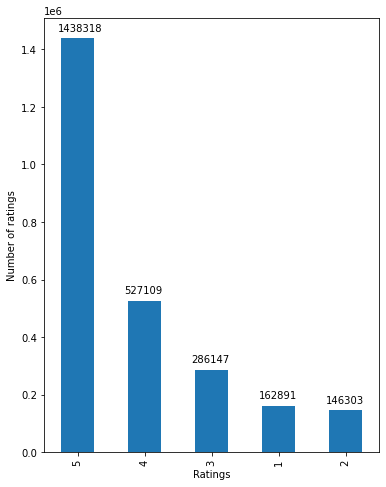

In [92]:
plt.figure(figsize=(6,8))
rating = df['rating'].value_counts()
ax = rating.plot(kind='bar')
for i,v in enumerate(rating):
    ax.text(i-0.3, v+25000, str(v))
plt.xlabel('Ratings')
plt.ylabel('Number of ratings')
plt.show()

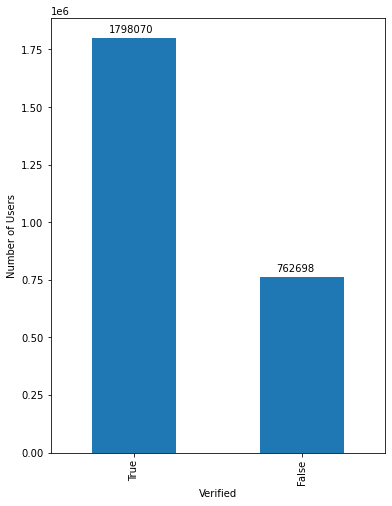

In [96]:
plt.figure(figsize=(6,8))
rating = df['verified'].value_counts()
ax = rating.plot(kind='bar')
for i,v in enumerate(rating):
    ax.text(i-0.15, v+25000, str(v))
plt.xlabel('Verified')
plt.ylabel('Number of Users')
plt.show()